# Kaggle Regression

# House Pricing

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import modulo_limpieza
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
pd.set_option('display.max_columns', 500)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

## Import Data

In [2]:
data = pd.read_csv('train.csv')
sub = pd.read_csv('test.csv')

In [3]:
id_sub = sub['Id']

## Data Structure

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

_The data has 81 columns, with SalePrice as the target._

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Null Data

In [6]:
pd.DataFrame(data.isnull().sum() / data.shape[0] * 100) 

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


_As seen above, Alley, FireplaceQu, PoolQC, Fence, MiscFeature have more than 40% of null data, these features will be eliminated._

In [7]:
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
          axis = 1, inplace = True)

sub.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
          axis = 1, inplace = True)

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Columns Names

In [9]:
continuous = ['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
             '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']
discrete = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
              'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
           'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
           'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition', 'LandContour']

In [10]:
# rename columns
new_cont = modulo_limpieza.renombrar_variables(continuous, 'continua')
new_disc = modulo_limpieza.renombrar_variables(discrete, 'discreta')

data.rename(columns = new_cont, inplace = True)
data.rename(columns = new_disc, inplace = True)

sub.rename(columns = new_cont, inplace = True)
sub.rename(columns = new_disc, inplace = True)

## Data Dummy

In [11]:
# columns names
dummies = data.select_dtypes(include=['object']).columns

#dummies
data = pd.get_dummies(data, columns=dummies, drop_first=True)

sub = pd.get_dummies(sub, columns=dummies, drop_first=True)

In [12]:
#same columns
columns_sub = list(sub.columns)
columns_sub.append('c_SalePrice')

data = data.loc[:, columns_sub]

## Outliers

In [13]:
IQR = modulo_limpieza.IQR(data.filter(like = 'c_'))
Percentil = modulo_limpieza.percentiles(data.filter(like = 'c_'))
Z_score = modulo_limpieza.z_score(data, columns = data.filter(like = 'c_').columns)

In [14]:
df_out = modulo_limpieza.tabla_out(IQR[1], Percentil[1], Z_score[1], IQR[0], Percentil[0], Z_score[0], data)
df_out

,features,n outliers IQR,n outliers Percentil,n outliers Z-Score,n outliers IQR %,n outliers Percentil %,n outliers Z-Score %,total outliers,% outliers,indices
0,c_Id,0,803,0,0.000000,55.000000,0.000000,0,0.000000,[]
1,c_LotFrontage,88,648,0,6.027397,44.383562,0.000000,88,6.027397,"[1029, 523, 1038, 1039, 36, 1061, 41, 56, 1088..."
2,c_LotArea,69,803,13,4.726027,55.000000,0.890411,69,4.726027,"[384, 769, 1409, 260, 1287, 523, 271, 1039, 52..."
3,c_MasVnrArea,96,70,0,6.575342,4.794521,0.000000,70,4.794521,"[640, 769, 898, 517, 1287, 1289, 1417, 523, 52..."
4,c_BsmtFinSF1,7,801,6,0.479452,54.863014,0.410959,7,0.479452,"[898, 70, 523, 178, 1298, 53, 1182]"
5,c_BsmtFinSF2,167,73,50,11.438356,5.000000,3.424658,73,5.000000,"[1024, 1025, 1152, 260, 263, 649, 1418, 271, 1..."
6,c_BsmtUnfSF,29,802,11,1.986301,54.931507,0.753425,29,1.986301,"[768, 774, 137, 1166, 22, 278, 1046, 798, 928,..."
7,c_TotalBsmtSF,61,802,10,4.178082,54.931507,0.684932,61,4.178082,"[897, 898, 259, 1412, 646, 392, 520, 778, 523,..."
8,c_1stFlrSF,20,803,12,1.369863,55.000000,0.821918,20,1.369863,"[1024, 898, 523, 529, 1298, 1044, 1182, 175, 1..."
9,c_2ndFlrSF,2,73,4,0.136986,5.000000,0.273973,4,0.273973,"[304, 1169, 691, 1182]"


_The outliers will be eliminated from the table, this will help to create a better statistical model._ 

In [15]:
# number of element to eliminate
aux_elementos = []

#iteration by indez
for variable in range(df_out.shape[0]):
    # auxiliar list for delete elements
    lista_auxiliar = list(set(df_out['indices'][variable]) & set(data.index))
    # drop data
    data.drop(lista_auxiliar, inplace = True)
    aux_elementos.append(data.shape[0])


In [16]:
pd.Series(index = df_out['features'], data = aux_elementos)

features
c_Id               1460
c_LotFrontage      1372
c_LotArea          1321
c_MasVnrArea       1264
c_BsmtFinSF1       1264
c_BsmtFinSF2       1205
c_BsmtUnfSF        1182
c_TotalBsmtSF      1142
c_1stFlrSF         1141
c_2ndFlrSF         1141
c_GrLivArea        1130
c_GarageYrBlt      1130
c_GarageArea       1125
c_WoodDeckSF       1109
c_OpenPorchSF      1059
c_EnclosedPorch    1005
c_3SsnPorch         987
c_ScreenPorch       942
c_PoolArea          940
c_MiscVal           910
c_MoSold            910
c_SalePrice         891
dtype: int64

_This process drop 39% of the data, this must be helpfull to the model._

In [17]:
data.reset_index(drop = True, inplace = True)

## Fill NA

In [18]:
data.isnull().sum()[data.isnull().sum() > 0].index

Index(['c_LotFrontage', 'c_MasVnrArea', 'c_GarageYrBlt'], dtype='object')

In [19]:
nulls_c = ['c_LotFrontage', 'c_MasVnrArea', 'c_GarageYrBlt']

In [20]:
#filling na continuous
for feat_c in nulls_c:
    data[feat_c].fillna(data[feat_c].median(), inplace = True) 

In [21]:
data.isnull().sum().values.sum()

0

### Fill NA Submission

In [22]:
sub.isnull().sum()[sub.isnull().sum() > 0].index

Index(['c_LotFrontage', 'c_MasVnrArea', 'c_BsmtFinSF1', 'c_BsmtFinSF2',
       'c_BsmtUnfSF', 'c_TotalBsmtSF', 'v_BsmtFullBath', 'v_BsmtHalfBath',
       'c_GarageYrBlt', 'v_GarageCars', 'c_GarageArea'],
      dtype='object')

In [23]:
sub_null_c = ['c_LotFrontage', 'c_MasVnrArea', 'c_BsmtFinSF1', 'c_BsmtFinSF2',
       'c_BsmtUnfSF', 'c_TotalBsmtSF', 'c_GarageYrBlt', 'c_GarageArea']

sub_null_v = ['v_BsmtFullBath', 'v_BsmtHalfBath', 'v_GarageCars']

In [24]:
#filling na continuous
for feat_c in sub_null_c:
    sub[feat_c].fillna(data[feat_c].median(), inplace = True)
    
#filling na discrete
for feat_v in sub_null_v:
    sub[feat_v].fillna(data[feat_v].mode()[0], inplace = True)    

In [25]:
sub.isnull().sum().values.sum()

0

## Feature Selection

### Low Correlation with Target

In [26]:
data.corr()['c_SalePrice'][np.abs(data.corr()['c_SalePrice']) < 0.02]

c_Id                     -0.011334
c_ScreenPorch             0.013644
v_YrSold                 -0.006653
v_LotShape_IR3            0.016095
v_LotConfig_FR2           0.006165
v_LotConfig_FR3           0.006997
v_Neighborhood_NPkVill   -0.013513
v_Condition1_RRNe         0.012464
v_RoofStyle_Mansard      -0.011368
v_RoofMatl_Tar&Grv       -0.016997
v_RoofMatl_WdShngl        0.001352
v_Exterior2nd_AsphShn    -0.007860
v_Exterior2nd_BrkFace     0.006808
v_Exterior2nd_ImStucc    -0.009113
v_Exterior2nd_Stone       0.006457
v_BsmtFinType2_LwQ       -0.015586
v_GarageQual_Gd           0.012284
Name: c_SalePrice, dtype: float64

In [27]:
low_corr = data.corr()['c_SalePrice'][np.abs(data.corr()['c_SalePrice']) < 0.02].index

_As showed above, c_ScreenPorc, v_YrSold have low correlation with the targer this will be drop from de data table._

In [28]:
data.drop(columns = low_corr, axis = 1, inplace = True)

In [29]:
sub.drop(columns = low_corr, axis = 1, inplace = True)

### High Correlation between other Features

In [30]:
#original features
orig_feat = data.iloc[:, 1:-1].columns

#original columns
ori_col = data.iloc[:, 1:-1].corr().columns

#iteration
for index in ori_col:
    if index in data.columns[1:-1]:
        #corr table
        corr_t = np.abs(data.iloc[:, 1:-1].corr())
        #iteration in features
        for feat in corr_t.loc[:, index][corr_t.loc[:, index] > 0.5].index:
            if feat != index and feat != 'c_SalePrice':
                data.drop(labels=feat, axis = 1, inplace=True)
                sub.drop(labels=feat, axis = 1, inplace=True)

In [31]:
for i in orig_feat:
    if i not in data.columns:
        print(i)

v_YearBuilt
v_YearRemodAdd
c_BsmtUnfSF
c_1stFlrSF
c_GrLivArea
v_BsmtFullBath
v_FullBath
v_HalfBath
v_TotRmsAbvGrd
c_GarageYrBlt
v_GarageCars
c_GarageArea
v_MSZoning_RM
v_LandContour_Lvl
v_Neighborhood_Somerst
v_Condition1_Norm
v_Condition2_Norm
v_BldgType_Duplex
v_HouseStyle_1Story
v_HouseStyle_2Story
v_RoofStyle_Hip
v_Exterior2nd_Brk Cmn
v_Exterior2nd_CmentBd
v_Exterior2nd_HdBoard
v_Exterior2nd_MetalSd
v_Exterior2nd_Plywood
v_Exterior2nd_Stucco
v_Exterior2nd_VinylSd
v_Exterior2nd_Wd Sdng
v_Exterior2nd_Wd Shng
v_MasVnrType_BrkFace
v_MasVnrType_None
v_ExterQual_Gd
v_ExterQual_TA
v_ExterCond_TA
v_Foundation_PConc
v_BsmtQual_TA
v_BsmtCond_TA
v_BsmtFinType1_Unf
v_BsmtFinType2_Unf
v_KitchenQual_Gd
v_KitchenQual_TA
v_Functional_Typ
v_GarageType_Detchd
v_GarageFinish_Unf
v_GarageCond_Po
v_GarageCond_TA
v_PavedDrive_Y
v_SaleType_WD
v_SaleCondition_Normal
v_SaleCondition_Partial


In [32]:
data.shape

(891, 150)

In [33]:
sub.shape

(1459, 149)

### High Correlation between the Target

In [34]:
var_1 = data[data['v_BsmtFinType1_GLQ'] == 1]['c_SalePrice']
var_0 = data[data['v_BsmtFinType1_GLQ'] == 0]['c_SalePrice']

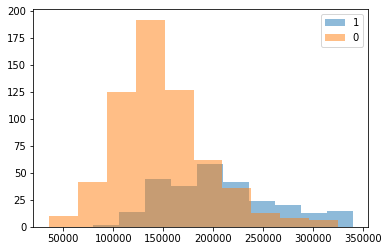

In [35]:
plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

In [36]:
var_1 = data[data['v_BsmtQual_Gd'] == 1]['c_SalePrice']
var_0 = data[data['v_BsmtQual_Gd'] == 0]['c_SalePrice']

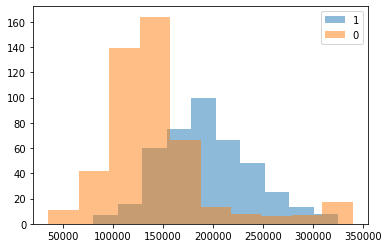

In [37]:
plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

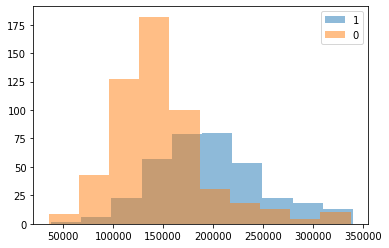

In [38]:
var_1 = data[data['v_Exterior1st_VinylSd'] == 1]['c_SalePrice']
var_0 = data[data['v_Exterior1st_VinylSd'] == 0]['c_SalePrice']

plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

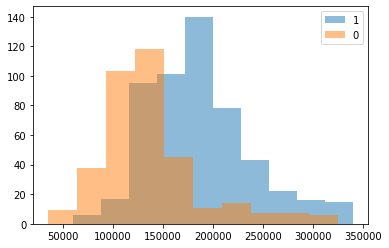

In [39]:
var_1 = data[data['v_GarageType_Attchd'] == 1]['c_SalePrice']
var_0 = data[data['v_GarageType_Attchd'] == 0]['c_SalePrice']

plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.legend([1,0])

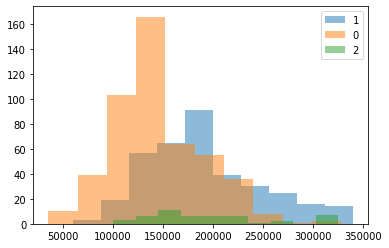

In [40]:
var_1 = data[data['v_Fireplaces'] == 1]['c_SalePrice']
var_0 = data[data['v_Fireplaces'] == 0]['c_SalePrice']
var_2 = data[data['v_Fireplaces'] == 2]['c_SalePrice']

plt.hist(var_1, alpha = .5)
plt.hist(var_0, alpha = .5)
plt.hist(var_2, alpha = .5)
plt.legend([1, 0, 2])

In [41]:
np.abs(data.corr()['c_SalePrice']).sort_values(ascending = False)[1:6]

v_OverallQual            0.807020
c_TotalBsmtSF            0.546061
v_BsmtFinType1_GLQ       0.469933
v_BsmtQual_Gd            0.452567
v_Exterior1st_VinylSd    0.429763
Name: c_SalePrice, dtype: float64

## Feature Selection

In [42]:
y_sel = data['c_SalePrice']
X_sel = data.drop('c_SalePrice', axis = 1)

In [43]:
from sklearn.model_selection import train_test_split

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sel, y_sel, test_size = 0.20, random_state = 1702)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

selection = SelectFromModel(RandomForestClassifier(n_estimators = 200, n_jobs=-1))
selection.fit(X_train_s, y_train_s)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200, n_jobs=-1))

In [45]:
columns_select = X_sel.columns[selection.get_support()]
columns_select

Index(['v_MSSubClass', 'c_LotFrontage', 'c_LotArea', 'v_OverallQual',
       'v_OverallCond', 'c_MasVnrArea', 'c_BsmtFinSF1', 'c_BsmtFinSF2',
       'c_TotalBsmtSF', 'c_2ndFlrSF', 'v_BedroomAbvGr', 'v_Fireplaces',
       'c_WoodDeckSF', 'c_OpenPorchSF', 'c_EnclosedPorch', 'c_MoSold',
       'v_MSZoning_RL', 'v_LotShape_Reg', 'v_LotConfig_Inside',
       'v_Neighborhood_CollgCr', 'v_Neighborhood_Edwards',
       'v_Neighborhood_NAmes', 'v_RoofStyle_Gable', 'v_Exterior1st_HdBoard',
       'v_Exterior1st_MetalSd', 'v_Exterior1st_VinylSd',
       'v_Exterior1st_Wd Sdng', 'v_MasVnrType_Stone', 'v_ExterCond_Gd',
       'v_Foundation_CBlock', 'v_BsmtQual_Gd', 'v_BsmtExposure_Mn',
       'v_BsmtExposure_No', 'v_BsmtFinType1_BLQ', 'v_BsmtFinType1_GLQ',
       'v_BsmtFinType1_Rec', 'v_HeatingQC_Gd', 'v_HeatingQC_TA',
       'v_GarageType_Attchd', 'v_GarageFinish_RFn', 'v_GarageQual_TA',
       'v_SaleType_New'],
      dtype='object')

In [46]:
len(columns_select)

42

## Modelo

In [47]:
y = data['c_SalePrice']
X = data.loc[:, columns_select]

In [48]:
X_sub = sub.loc[:, columns_select]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1702)

In [50]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

### Standar Scaler

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X = X_train)
X_ss_train = ss.transform(X_train)

In [52]:
X_ss_sub = ss.transform(X_sub)

In [53]:
y_mean = y_train.mean()
y_std = y_train.std()
y_ss_train = (y_train - y_mean) /  y_std

## Random Forest

In [54]:
n_estimators = [575, 600, 625]
max_features = ['auto']
max_depth = [18, 20, 22]
min_samples_split = [2, 3]
min_samples_leaf = [1,2]

In [55]:
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'criterion': ['mse'],
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'random_state': [1702]}

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

rf_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = -1,
                       scoring = 'neg_mean_absolute_error')

In [57]:
rf_grid.fit(X_ss_train, y_ss_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [18, 20, 22],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [575, 600, 625],
                         'random_state': [1702]},
             scoring='neg_mean_absolute_error', verbose=2)

In [58]:
rf_grid.best_params_

{'criterion': 'mse',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 625,
 'random_state': 1702}

In [59]:
from sklearn.metrics import mean_squared_error

error_train = mean_squared_error(y_true = y_ss_train, y_pred = rf_grid.predict(X_ss_train), squared = False)
error_train

0.15746727580370515

## Test Modelo 1

In [60]:
X_ss_test = ss.transform(X_test)

In [61]:
y_ss_test = (y_test - y_mean) /  y_std

In [62]:
error_test = mean_squared_error(y_true = y_ss_test, y_pred = rf_grid.predict(X_ss_test), squared = False)
error_test

0.39496177175942054

## SVM

In [63]:
from sklearn.svm import SVR

model2 = SVR(C = 10000)
model2.fit(X_ss_train, y_ss_train)

SVR(C=10000)

In [64]:
error_train = mean_squared_error(y_true = y_ss_train, y_pred = model2.predict(X_ss_train), squared = False)
error_train

0.0912948467316581

## Test Modelo 2

In [65]:
error_test = mean_squared_error(y_true = y_ss_test,y_pred = model2.predict(X_ss_test), squared = False)
error_test

0.39841481507003196

## Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X_ss_train, y_ss_train)

LinearRegression()

In [67]:
error_train = mean_squared_error(y_true = y_ss_train, y_pred = model3.predict(X_ss_train), squared = False)
error_train

0.37232757274295414

### Significacia de Cada Variable en la Regresión

In [68]:
var_error = np.var(y_ss_train - model3.predict(X_ss_train))
sum_sqr = np.dot(X_ss_train.T, X_ss_train).diagonal()

In [69]:
se_sqr = var_error / sum_sqr
se = np.sqrt(se_sqr)

In [70]:
rechazo = (np.abs(model3.coef_ / se) > 1.96)

In [71]:
columns_select[rechazo]

Index(['v_MSSubClass', 'c_LotFrontage', 'c_LotArea', 'v_OverallQual',
       'v_OverallCond', 'c_BsmtFinSF1', 'c_TotalBsmtSF', 'c_2ndFlrSF',
       'v_BedroomAbvGr', 'v_Fireplaces', 'c_WoodDeckSF', 'c_OpenPorchSF',
       'v_MSZoning_RL', 'v_LotShape_Reg', 'v_Neighborhood_CollgCr',
       'v_Neighborhood_Edwards', 'v_Exterior1st_HdBoard',
       'v_Exterior1st_Wd Sdng', 'v_MasVnrType_Stone', 'v_Foundation_CBlock',
       'v_BsmtExposure_Mn', 'v_BsmtExposure_No', 'v_BsmtFinType1_GLQ',
       'v_HeatingQC_Gd', 'v_HeatingQC_TA', 'v_GarageQual_TA',
       'v_SaleType_New'],
      dtype='object')

In [72]:
X_linear_train = X_ss_train[:, rechazo]

model3_2 = LinearRegression()
model3_2.fit(X_linear_train, y_ss_train)

LinearRegression()

In [73]:
error_train = mean_squared_error(y_true = y_ss_train, y_pred = model3_2.predict(X_linear_train), squared = False)
error_train

0.3761248967449247

## Test 3

In [74]:
error_test = mean_squared_error(y_true = y_ss_test,y_pred = model3.predict(X_ss_test), squared = False)
error_test

0.3931041717741756

## Test 3_2

In [75]:
X_linear_test = X_ss_test[:, rechazo]

error_test = mean_squared_error(y_true = y_ss_test,y_pred = model3_2.predict(X_linear_test), squared = False)
error_test

0.3917248384860147

## Polynomial

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
poly.fit(X_ss_train)
X_poly_train = poly.transform(X_ss_train)

model4 = LinearRegression()
model4.fit(X_poly_train, y_ss_train)

LinearRegression()

In [77]:
error_train = mean_squared_error(y_true = y_ss_train, y_pred = model4.predict(X_poly_train), squared = False)
error_train

5.9278582837037126e-15

## Test 4

In [78]:
X_poly_test = poly.transform(X_ss_test)

error_test = mean_squared_error(y_true = y_ss_test, y_pred = model4.predict(X_poly_test), squared = False)
error_test

0.4270779522123232

## Neural Network

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [80]:
model5 = Sequential()
model5.add(Dense(1024, activation = 'relu', input_shape = (None, X_ss_train.shape[1])))
model5.add(Dense(512, activation = 'relu'))
model5.add(Dropout(0.3))
model5.add(Dense(256, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64, activation = 'relu'))
model5.add(Dropout(0.2))
model5.add(Dense(32, activation = 'relu'))
model5.add(Dense(1))
model5.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 1024)        44032     
_________________________________________________________________
dense_1 (Dense)              (None, None, 512)         524800    
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
dense_2 (Dense)              (None, None, 256)         131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense_3 (Dense)              (None, None, 64)          16448     
_________________________________________

In [81]:
X_ss_train_2 = np.reshape(X_ss_train, (X_ss_train.shape[0], 1, X_ss_train.shape[1]))

In [82]:
model5.compile(optimizer='rmsprop', loss = 'mae', metrics = ['mae'])

In [83]:
model5.fit(X_ss_train_2, y_ss_train,
                    epochs=40, batch_size=1, verbose=0)

In [84]:
#k-folds
k = 4
num_val_samples = len(X_ss_train) // k
all_scores = []

In [85]:
for i in range(k):
    print('processing fold #', i)
    val_data = X_ss_train_2[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_ss_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [X_ss_train_2[:i * num_val_samples],
        X_ss_train_2[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_ss_train[:i * num_val_samples],
        y_ss_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    if i != 3:
        model5.fit(partial_train_data, partial_train_targets,
                    epochs=10, batch_size=1, verbose=0)
    else:
        model5.fit(partial_train_data, partial_train_targets,
                    epochs=40, batch_size=1, verbose=1)
    
    val_mse, val_mae = model5.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
Train on 534 samples
Epoch 1/40
534/534 [==============================] - 2s 3ms/sample - loss: 0.1904 - mean_absolute_error: 0.1904
Epoch 2/40
534/534 [==============================] - 1s 2ms/sample - loss: 0.1911 - mean_absolute_error: 0.1911
Epoch 3/40
534/534 [==============================] - 1s 3ms/sample - loss: 0.1723 - mean_absolute_error: 0.1723
Epoch 4/40
534/534 [==============================] - 2s 3ms/sample - loss: 0.1816 - mean_absolute_error: 0.1816
Epoch 5/40
534/534 [==============================] - 2s 3ms/sample - loss: 0.1818 - mean_absolute_error: 0.1818
Epoch 6/40
534/534 [==============================] - 2s 3ms/sample - loss: 0.1745 - mean_absolute_error: 0.1745
Epoch 7/40
534/534 [==============================] - 1s 2ms/sample - loss: 0.1674 - mean_absolute_error: 0.1674
Epoch 8/40
534/534 [==============================] - 1s 2ms/sample - loss: 0.1696 - mean_absolute_error: 0.

In [86]:
all_scores

[0.93479383, 1.0192325, 0.92540723, 0.98913854]

In [87]:
X_ss_test_2 = np.reshape(X_ss_test, (X_ss_test.shape[0], 1, X_ss_test.shape[1]))

In [88]:
error_train = mean_squared_error(y_true = y_ss_train, 
                                 y_pred = model5.predict(X_ss_train_2)[:, 0, 0], squared = False)
error_train

0.2503711547303698

In [89]:
error_test = mean_squared_error(y_true = y_ss_test,
                                y_pred = model5.predict(X_ss_test_2)[:, 0, 0], squared = False)
error_test

0.3889922236472311

## Test Final

In [90]:
X_pred = (model2.predict(X_ss_test) + rf_grid.predict(X_ss_test) + model3.predict(X_ss_test) +
          model4.predict(X_poly_test) + model5.predict(X_ss_test_2)[:, 0, 0] + 
         model3_2.predict(X_linear_test))/6

In [91]:
error_test = mean_squared_error(y_true = y_ss_test, y_pred = X_pred, squared = False)
error_test

0.3428528930679695

## Submission

In [92]:
X_poly_sub = poly.transform(X_ss_sub)
X_linear_sub = X_ss_sub[:, rechazo]
X_ss_sub_2 = np.reshape(X_ss_sub, (X_ss_sub.shape[0], 1, X_ss_sub.shape[1]))

y_sub = (model2.predict(X_ss_sub) + rf_grid.predict(X_ss_sub) + model3.predict(X_ss_sub) +
          model4.predict(X_poly_sub) + model5.predict(X_ss_sub_2)[:, 0, 0] +
         model3_2.predict(X_linear_sub))/6

In [93]:
y_final = y_sub * y_std + y_mean

In [96]:
#pd.DataFrame(data = y_final, index = id_sub, columns = ['SalePrice']).to_csv('submission.csv')

In [95]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()